# Scipy.stats Tutorials - Statistical Hypothesis Tests - Part 2

**CONTENTS**

- [Parametric Statistical Hypothesis Tests](#parametric)
    + [Student's t-test](#ttest)
    + [Paired Student's t-test](#pttest)
    + [Analysis of Variance Test (ANOVA)](#anova)
    + [Repeated Measures ANOVA Test](#ranova)
- [Nonparametric Statistical Hypothesis Tests](#nonparametric)
     + [Mann-Whitney U Test](#Mann-Whitney-U)
     + [Wilcoxon Signed-Rank Test](#Wilcoxon-Signed-Rank)
     + [Kruskal-Wallis H Test](#kruskal-WallisH)
     + [Friedman Test](#friedman)

In [29]:
### Note thet the scipy version for this tutorial is 1.4.1. 
# The functions are likely different in other scipy versions.
# In version 1.6.0., the functions have 'alternative' parameter for {‘two-sided’, ‘less’, ‘greater’}
# default is 'two-sided' test
import scipy.stats
print(scipy.__version__)

1.4.1


### CHEAT SHEET FOR STATISTICAL HYPOTHESIS TESTS

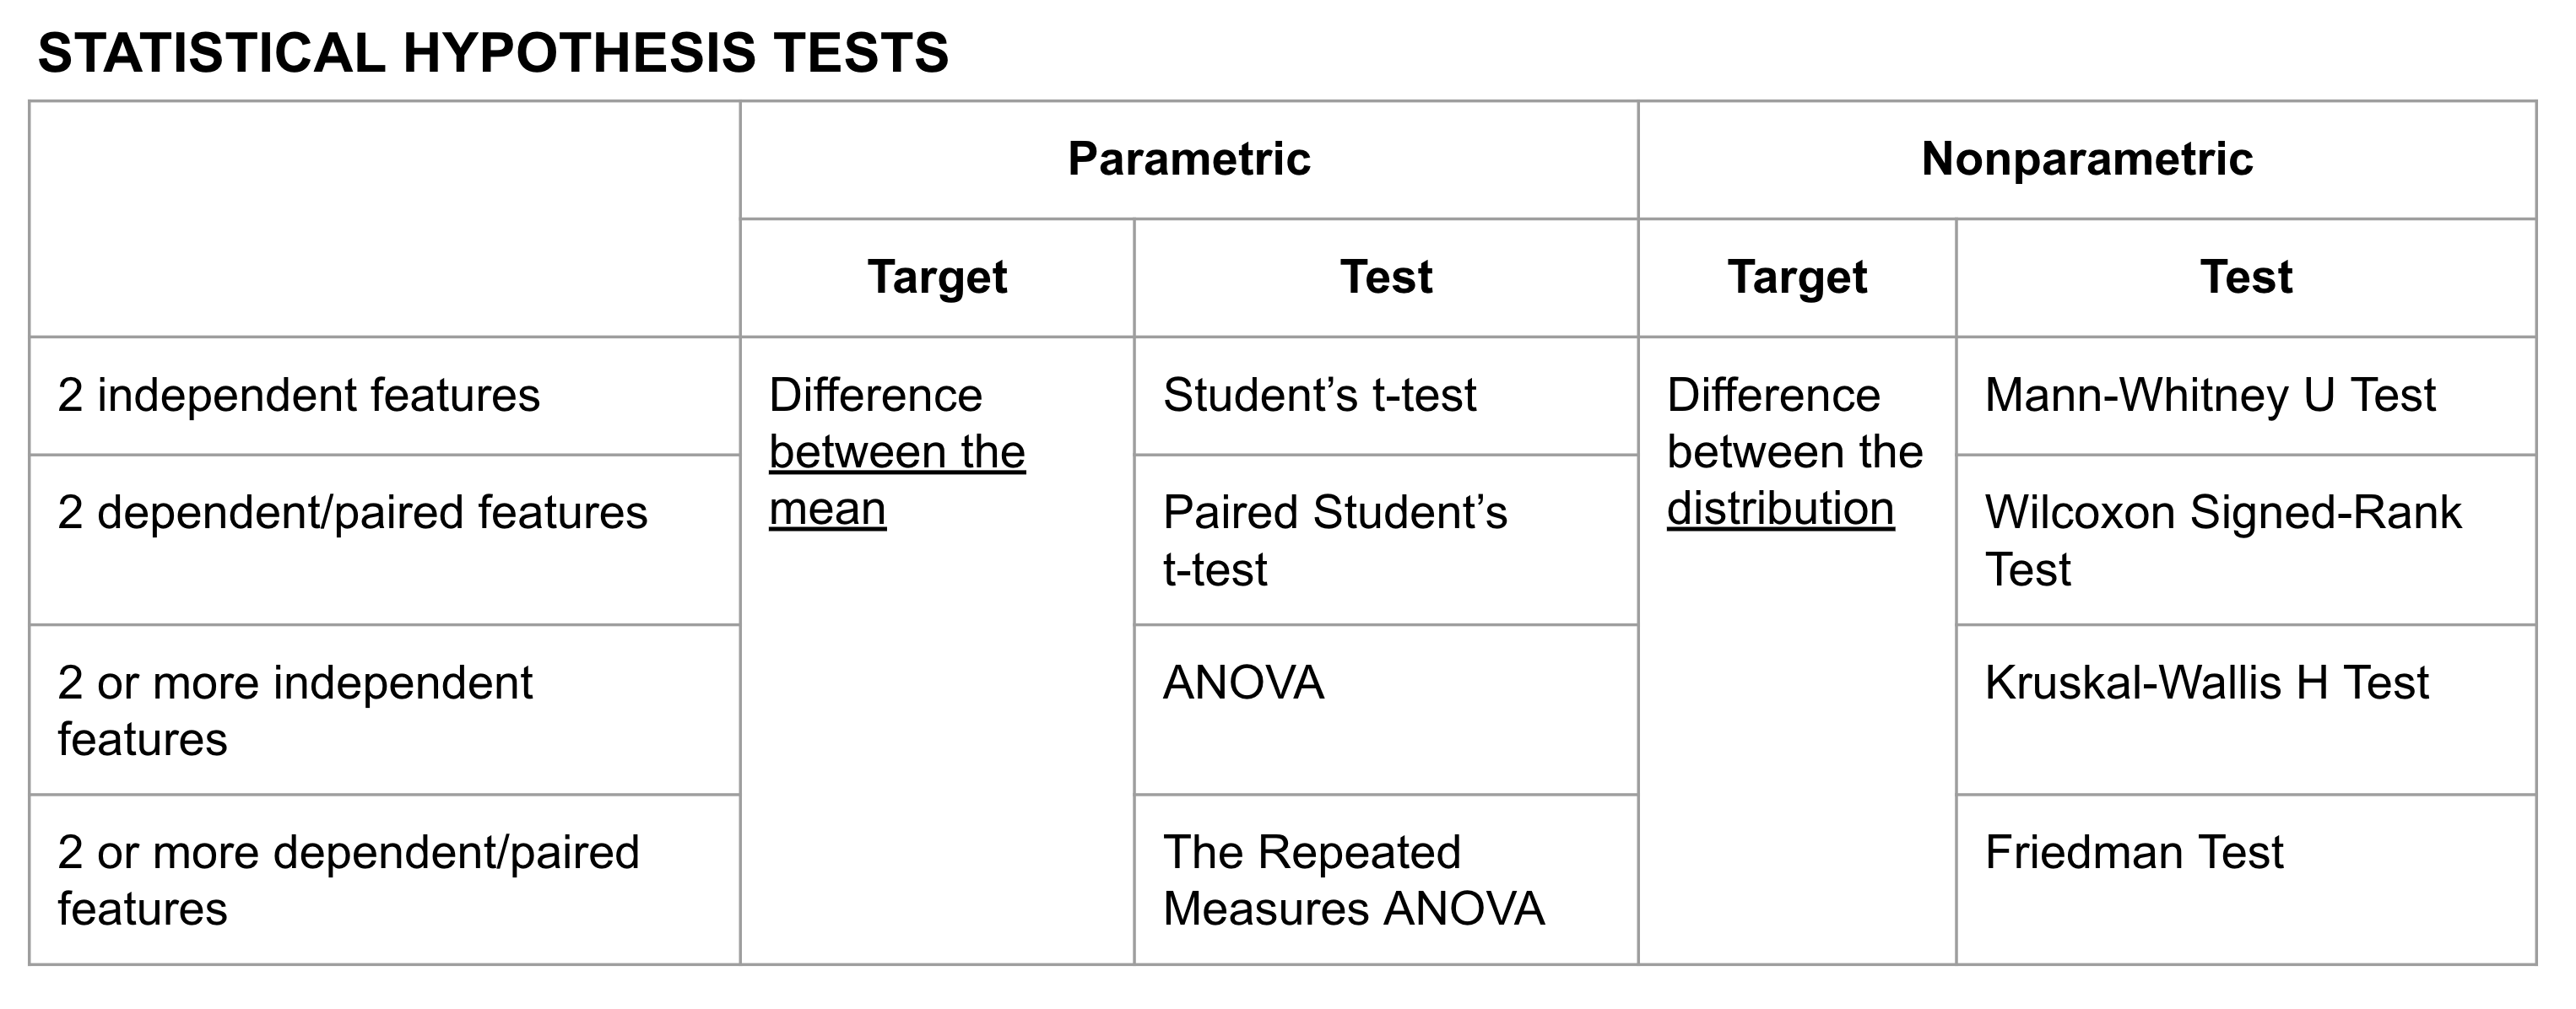

In [2]:
from IPython.display import Image
Image("img/statistical_tests2.png")

[Ref](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) 

<a id='parametric'></a>
## 1. PARAMETRIC STATISTICAL HYPOTHESIS TESTS

- Parametric statistical tests: the tests that assume the data have a Gaussian distribution.

#### GOAL
    - To check if the mean of the populations are equal.
    
#### ASSUMPTIONS
    - Observations are identically distributed
    - The populations have the Gaussian distribution
    - Have the same variance
    
#### HYPOTHESIS
    - H0: the means are equal
    - H1: the means are different.
    
#### SOME COMMON TESTS

- **The Student's t-Test**:
    + the difference between the **mean** of 2 **independent** data samples
- **The Paired Student's t-Test**:
    + the difference between the **mean** of 2 **dependent** data samples 
- **The ANOVA Test**:
    + the difference between the **mean** of 2 or more data samples
- **The Repeated Measures ANOVA Test**:
    + the difference between the **mean** of 2 or more **paired dependent** data samples

### EXAMPLES OF GAUSIAN DISTRIBUTION DATASET FOR THE TUTORIALS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

(100,) (100,)
Mean and standard deviation of the datasets:
Dataset 1: mean 98.623, stdv 19.030
Dataset 2: mean 112.648, stdv 16.180
Dataset 3: mean 105.182, stdv 20.635


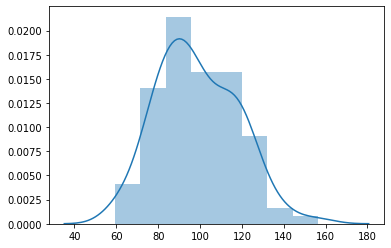

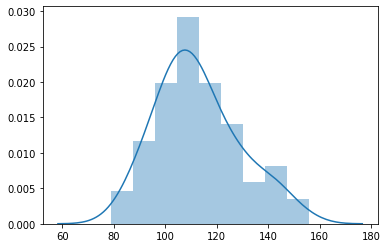

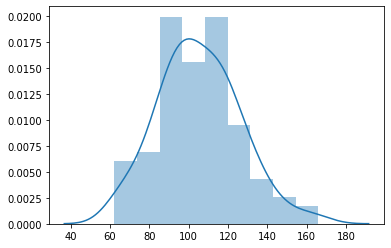

In [38]:
#### Create 2 Gausian distribution datasets as example for the statistical hypothesis tests
normal_dataset1 = 20 * np.random.randn(100) + 100 # mean ~100, stdv of ~21
normal_dataset2 = 20 * np.random.randn(100) + 110 # mean ~100, stdv of ~23
normal_dataset3 = 20 * np.random.randn(100) + 101 # mean ~100, stdv of ~23

print(normal_dataset1.shape, normal_dataset2.shape)
print("Mean and standard deviation of the datasets:")
print("Dataset 1: mean %.3f, stdv %.3f" % (np.mean(normal_dataset1), np.std(normal_dataset1)))
print("Dataset 2: mean %.3f, stdv %.3f" % (np.mean(normal_dataset2), np.std(normal_dataset2)))
print("Dataset 3: mean %.3f, stdv %.3f" % (np.mean(normal_dataset3), np.std(normal_dataset3)))
sns.distplot(normal_dataset1)
plt.show()
sns.distplot(normal_dataset2)
plt.show()
sns.distplot(normal_dataset3)
plt.show()

<a id='ttest'></a>
### 1.1. THE STUDENT'S T-TEST

##### ASSUMPTIONS
- Beside the general assumptions for parametric test, the observations in each sample are independent
- `ttest_ind` from `scipy.stats` is a two-sided/two-tailed test 

#### 1.1.1. TWO TAILED T-TEST

##### Hypothesis
    - H0: the means are equal (u1 = u2)
    - H1: the means are different (u1 != u2)
   => `ttest_ind(u1, u2)` test makes a hypothesis test on the value of `u1.mean() - u2.mean()`

In [14]:
### Set significance level
alpha = 0.05
from scipy.stats import ttest_ind
stat, p = ttest_ind(normal_dataset1, normal_dataset2)
print("The Student's t-test result:\nStatistic = %.3f, p = %.3f" % (stat,p))
if p > alpha:
    print("Failed to reject H0 => The means of the two population are equal")
else:
    print("Reject H0 => The means of the two population are different, with a significance of at least %.0f%%" % (alpha*100))

The Student's t-test result:
Statistic = -2.207, p = 0.028
Reject H0 => The means of the two population are different, with a significance of at least 5%


##### 1.1.2. ONE TAILED T-TEST

##### Hypothesis

    - H0: the means are equal (u1 = u2)
    - H1: the mean u1 is greater than or less than u2

In [31]:
print("Mean 1: %.3f" % np.mean(normal_dataset1))
print("Mean 2: %.3f" % np.mean(normal_dataset2))

Mean 1: 99.884
Mean 2: 106.430


In this case, mean_2 is obviously > mean_1, the hypothesis would be

**Hypothesis**
    - H0: u1 >= u2
    - H1: u2 > u1
    
=> Need to set x = u2, y = u1 in the function scipy.stats.ttest_ind(x, y)

In [34]:
### Set significance level
alpha = 0.05
stat, p = ttest_ind(normal_dataset2, normal_dataset1)

print("The Student's t-test result:\nStatistic = %.3f, p = %.3f" % (stat,p))
if p/2 > alpha:
    print("Failed to reject H0 => The means of the two population are equal")
else:
    print("Reject H0 => The means of the normal_dataset2 is greater than normal_dataset1, with a significance of at least %.0f%%" % (alpha*100))

The Student's t-test result:
Statistic = 2.207, p = 0.028
Reject H0 => The means of the normal_dataset2 is greater than normal_dataset1, with a significance of at least 5%


<a id='pttest'></a>
### 1.2. THE PAIRED STUDENT'S T-TEST

##### ASSUMPTIONS
- Beside the general assumptions for parametric test, the observations in each sample are **dependent**.
- Example of dependent populations:
    + Repeat the same measurements on a subject at different time periods.
    + The same ML algorithm evaluated on different datasets
    + Different algorithms evaluated on exactly the same training and test data.
- `ttest_rel` from `scipy.stats` is a two-sided/two-tailed test 

In [39]:
from scipy.stats import ttest_rel
### Set significance level
alpha = 0.05

### Although normal_dataset1 and normal_dataset2 are independent, let pretend that they're paired dataset
stat, p = ttest_rel(normal_dataset1, normal_dataset2)
print("The Paired Student's t-test result:\nStatistic = %.3f, p = %.3f" % (stat,p))
if p > alpha:
    print("Failed to reject H0 => The means of the two population are equal")
else:
    print("Reject H0 => The means of the two population are different, with a significance of at least %.0f%%" % (alpha*100))

The Paired Student's t-test result:
Statistic = -5.905, p = 0.000
Reject H0 => The means of the two population are different, with a significance of at least 5%


<a id='anova'></a>
### 1.3. THE ANALYSIS OF VARIANCE TEST (ANOVA)

##### ASSUMPTIONS
- Beside the general assumptions for parametric test, the observations in each sample are **independent**.

##### Hypothesis
    - H0: All the means are equal (u1 = u2 = u3 ...)
    - H1: the mean of one or more populations are not equal
- `f_oneway` from `scipy.stats`

In [41]:
from scipy.stats import f_oneway

stat, p = f_oneway(normal_dataset1, normal_dataset2, normal_dataset3)
print("The ANOVA result:\nStatistic = %.3f, p = %.3f" % (stat , p))
if p > alpha:
    print("Failed to reject H0 => The means of all the population are equal")
else:
    print("Reject H0 => The means of one or more populations are not equal, with a significance of at least %.0f%%" % (alpha*100))

The ANOVA result:
Statistic = 13.931, p = 0.000
Reject H0 => The means of one or more populations are not equal, with a significance of at least 5%


In [42]:
### check another dataset
dataset1 = 20 * np.random.randn(100) + 100
dataset2 = 20 * np.random.randn(100) + 100
dataset3 = 20 * np.random.randn(100) + 100
stat, p = f_oneway(dataset1, dataset2, dataset3)
print("The ANOVA result:\nStatistic = %.3f, p = %.3f" % (stat , p))
if p > alpha:
    print("Failed to reject H0 => The means of all the population are equal")
else:
    print("Reject H0 => The means of one or more populations are not equal, with a significance of at least %.0f%%" % (alpha*100))

The ANOVA result:
Statistic = 0.295, p = 0.745
Failed to reject H0 => The means of all the population are equal


<a id='ranova'></a>
### 1.4. REPEATED MEASURES ANOVA TEST

##### ASSUMPTIONS
- Beside the general assumptions for parametric test, the observations in each sample are **dependent**.

##### Hypothesis
    - H0: All the means are equal (u1 = u2 = u3 ...)
    - H1: the mean of one or more populations are not equal
    
- Using `AnovaRM` from `statsmodels.stats.anova` since this test is not available in `scipy.stats`

<a id='nonparametric'></a>
## 2. NONPARAMETRIC STATISTICAL HYPOTHESIS TESTS


- Nonparametric statistical tests: the tests that assume the data don't have a Gaussian distribution.
    
#### SOME COMMON TESTS

- **Mann-Whitney U Test**:
    + the difference between the **distribution** of 2 **independent** data samples
- **Wilcoxon Signed-Rank Test**:
    + the difference between the **distribution** of 2 **dependent** data samples 
- **Kruskal-Wallis H Test**:
    + the difference between the **distribution** of 2 or more data samples
- **Friedman Test**:
    + the difference between the **distribution** of 2 or more **paired dependent** data samples

### EXAMPLES OF NON-NORMAL DISTRIBUTION DATASET FOR THE TUTORIALS

(100,) (100,)
Mean and standard deviation of the datasets:
Dataset 1: mean 42.161, stdv 50.904
Dataset 2: mean 107.826, stdv 284.995


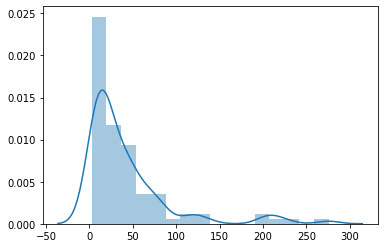

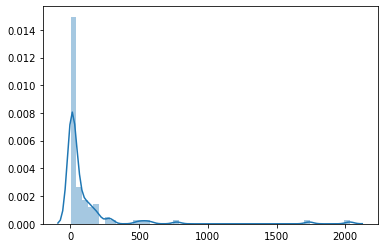

In [62]:
# Draw samples from a log-normal distribution.
mu, sigma = 3, 1 # mean and standard deviation
log_dataset1 = np.random.lognormal(mu, sigma, 100)
log_dataset2 = np.random.lognormal(mu, sigma + 1, 100)
print(log_dataset1.shape, log_dataset2.shape)
print("Mean and standard deviation of the datasets:")
print("Dataset 1: mean %.3f, stdv %.3f" % (np.mean(log_dataset1), np.std(log_dataset1)))
print("Dataset 2: mean %.3f, stdv %.3f" % (np.mean(log_dataset2), np.std(log_dataset2)))
sns.distplot(log_dataset1)
plt.show()
sns.distplot(log_dataset2)
plt.show()

<a id='Mann-Whitney-U'></a>
### 2.1. MANN-WHITNEY U TEST

##### ASSUMPTIONS
- Beside the general assumptions for nonparametric test, the observations in each sample are independent

##### Hypothesis
    - H0: the distributions of both samples are equal
    - H1: the distributions of both samples are different

In [63]:
### Test 2 log_datasets
### Set significance level
alpha = 0.05
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(log_dataset1, log_dataset2)
print("The Student's t-test result:\nStatistic = %.3f, p = %.3f" % (stat,p))
if p > alpha:
    print("Failed to reject H0 => the distributions of both samples are equal")
else:
    print("Reject H0 => the distributions of both samples are different, with a significance of at least %.0f%%" % (alpha*100))

The Student's t-test result:
Statistic = 4572.000, p = 0.148
Failed to reject H0 => the distributions of both samples are equal


In [66]:
### Test a log_dataset and a normal_distribution dataset
stat, p = mannwhitneyu(log_dataset1, normal_dataset1)
print("The Mann-Whitney-U Test result:\nStatistic = %.3f, p = %.3f" % (stat,p))
if p > alpha:
    print("Failed to reject H0 => the distributions of both samples are equal")
else:
    print("Reject H0 => the distributions of both samples are different, with a significance of at least %.0f%%" % (alpha*100))

The Mann-Whitney-U Test result:
Statistic = 976.000, p = 0.000
Reject H0 => the distributions of both samples are different, with a significance of at least 5%


<a id='Wilcoxon-Signed-Rank'></a>
### 2.2. WILCOXON SIGNED-RANK TEST

##### ASSUMPTIONS
- Beside the general assumptions for nonparametric test, the observations in each sample are **dependent**.
- Example of dependent populations:
    + Repeat the same measurements on a subject at different time periods.
    + The same ML algorithm evaluated on different datasets
    + Different algorithms evaluated on exactly the same training and test data.
    
##### Hypothesis
    - H0: the distributions of both samples are equal
    - H1: the distributions of both samples are different

In [67]:
### Although log_dataset1, log_dataset2 are independent, let pretend that they're paired dataset
from scipy.stats import wilcoxon
stat, p = wilcoxon(log_dataset1, log_dataset2)
print("The Wilcoxon Signed-Rank Test result:\nStatistic = %.3f, p = %.3f" % (stat,p))
if p > alpha:
    print("Failed to reject H0 => the distributions of both samples are equal")
else:
    print("Reject H0 => the distributions of both samples are different, with a significance of at least %.0f%%" % (alpha*100))

The Wilcoxon Signed-Rank Test result:
Statistic = 2283.000, p = 0.405
Failed to reject H0 => the distributions of both samples are equal


<a id='kruskal-WallisH'></a>
### 2.3. KRUSKAL - WALLIS H TEST

##### ASSUMPTIONS
- Beside the general assumptions for nonparametric test, the observations in each sample are **independent**.

##### Hypothesis
    - H0: Athe distributions of all samples are equal.
    - H1: The distributions of one or more samples are not equal.

In [68]:
from scipy.stats import kruskal
stat, p = kruskal(log_dataset1, log_dataset2, normal_dataset1)
print("The Kruskal Wallis H result:\nStatistic = %.3f, p = %.3f" % (stat,p))
if p > alpha:
    print("Failed to reject H0 => the distributions of all samples are equal")
else:
    print("Reject H0 => the distributions of one or more samples are not equal, with a significance of at least %.0f%%" % (alpha*100))

The Kruskal Wallis H result:
Statistic = 86.656, p = 0.000
Reject H0 => the distributions of both samples are different, with a significance of at least 5%


<a id='friedman'></a>
### 2.4. FRIEDMAN TEST

##### ASSUMPTIONS
- Beside the general assumptions for nonparametric test, the observations in each sample are **dependent**.

##### Hypothesis
    - H0: Athe distributions of all samples are equal.
    - H1: The distributions of one or more samples are not equal.

In [69]:
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(log_dataset1, log_dataset2, normal_dataset1)
print("The Friedman test result:\nStatistic = %.3f, p = %.3f" % (stat,p))
if p > alpha:
    print("Failed to reject H0 => the distributions of all samples are equal")
else:
    print("Reject H0 => the distributions of one or more samples are not equal, with a significance of at least %.0f%%" % (alpha*100))

The Friedman test result:
Statistic = 65.520, p = 0.000
Reject H0 => the distributions of one or more samples are not equal, with a significance of at least 5%
